In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

In [33]:
# получение данных из файла
df=pd.read_csv('Сроки разрезы.csv')

df['Дата'] = df['ДатаВыхода'].str.split(' ').str[0]

df_group = df[['ДнейВРемонте', 'Дата']].groupby('Дата', as_index=False).mean()

df_group_per = df[['ДнейВРемонте', 'Дата', 'СрокНаФП', 'СрокВТранзите', 'СрокВАСЦ', 'СрокРСЦ', 'СрокДрФилиал']].groupby('Дата', as_index=False).mean()

df.head()

,ДатаВыхода,Филиал,Товар,Выход,ОперацияДокумента,ДнейВРемонте,СрокНаФП,СрокВТранзите,СрокВАСЦ,СрокРСЦ,СрокДрФилиал,Дата
0,2020-06-17 10:32:46.000,180,1345630,АД,Гарантийный ремонт,59.831817,20.169849,4.857419,NaN,NaN,34.804549,2020-06-17
1,2020-07-01 12:32:38.000,180,1615669,Выдача,Гарантийный ремонт,37.839838,32.978206,2.968032,NaN,NaN,1.893600,2020-07-01
2,2020-06-29 12:26:46.000,180,1381635,АД,Гарантийный ремонт,24.875000,1.791238,2.096875,14.00809,6.023600,0.955197,2020-06-29
3,2020-06-17 14:42:58.000,180,8109626,АД,Проверка качества,6.047882,1.866215,3.325463,NaN,0.015509,0.840694,2020-06-17
4,2020-06-27 10:10:17.000,180,1131595,Выдача,Проверка качества,10.812269,1.970567,4.988831,NaN,NaN,3.852870,2020-06-27


# Линейный графики

* px.line(data_frame, x, y, title) - отрисовка линии, data_frame - таблица данных, x,у - столбцы, title - заголовок
* fig = go.Figure() - создание объекта, fig - наименование графического объекта
* .add_trace() - добавление линии
* go.Scatter(x, y, mode, name, line)) - параметры линии, x,у - столбцы даннх, mode - вид линии, name - наименование в легенде, line - доп. параметры линии
* .update_layout(title, xaxis_title, yaxis_title) - задаем параметры графика, title - заголовок, xaxis_title,yaxis_title - заголовки осей х и у
* .show() - вывести граифческий объект

### Простой график

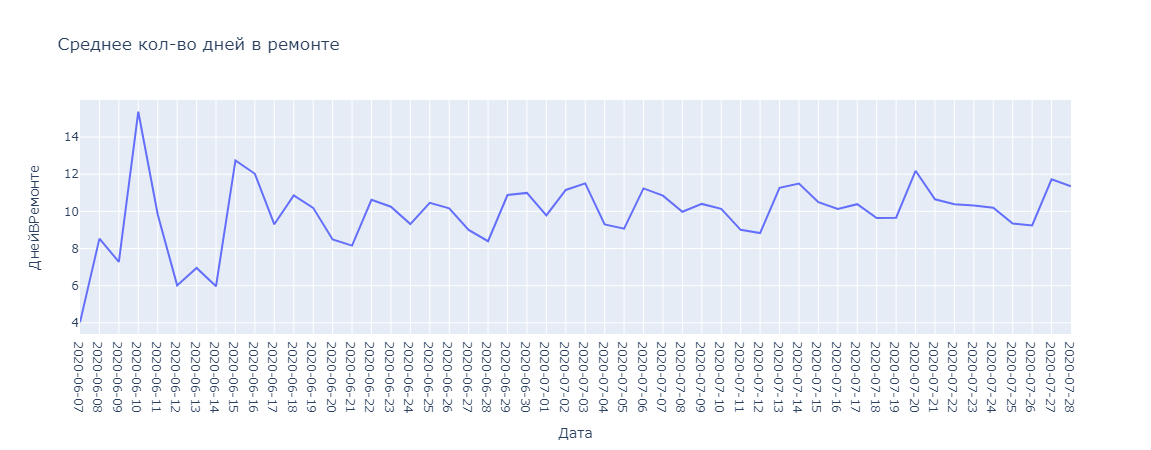

In [15]:
fig = px.line(df_group, x="Дата", y="ДнейВРемонте", title='Среднее кол-во дней в ремонте')

fig.update_xaxes(type='category')
fig.show()

### График с несколькими рядами данных

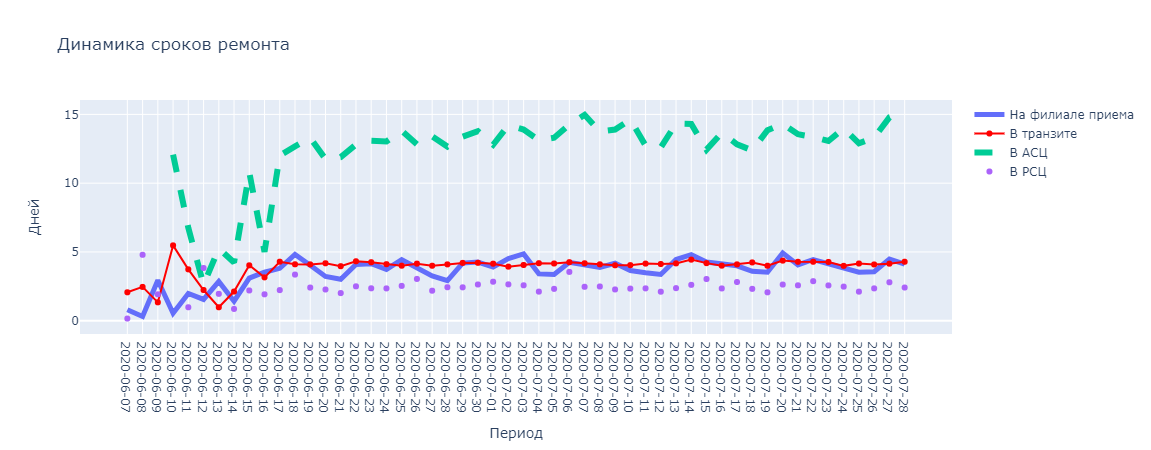

In [16]:
fig = go.Figure()

# №1
fig.add_trace(go.Scatter(x=df_group_per['Дата'], 
                         y=df_group_per['СрокНаФП'], 
                         mode='lines', 
                         name='На филиале приема', 
                         line={'width' : 5}
                        )
             )

# №2
fig.add_trace(go.Scatter(x=df_group_per['Дата'], 
                         y=df_group_per['СрокВТранзите'], 
                         mode='lines+markers', 
                         name='В транзите', 
                         line=dict(color='red')
                        )
             )
# №3
fig.add_trace(go.Scatter(x=df_group_per['Дата'], 
                         y=df_group_per['СрокВАСЦ'], 
                         mode='lines', 
                         name='В АСЦ', 
                         line=dict(width=6,  dash='dash')
                        )
             )

# №4
fig.add_trace(go.Scatter(x=df_group_per['Дата'], 
                         y=df_group_per['СрокРСЦ'], 
                         mode='markers', 
                         name='В РСЦ'
                        )
             )


fig.update_layout(title='Динамика сроков ремонта',
                   xaxis_title='Период',
                   yaxis_title='Дней')

fig.update_xaxes(type='category')

fig.show()

## Тип оси, Проценты

In [17]:
# Подсчет доли

df['Меньше1Дня']=0 # создана новая, пустая колонка

df['Меньше1Дня'][df['ДнейВРемонте']<1]=1

df_group_45=df[['Дата', 'Меньше1Дня']].groupby(by='Дата').agg(['sum', 'count']).reset_index() # Создается новый датафрейм.

df_group_45['ДоляМеньше1Дня']=df_group_45['Меньше1Дня']['sum']/df_group_45['Меньше1Дня']['count']

df_group_45[10:15]

<ipython-input-17-c6cd7454f6f6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Дата Меньше1Дня       ДоляМеньше1Дня
                      sum count               
10  2020-06-17       2302  6211       0.370633
11  2020-06-18       2093  5856       0.357411
12  2020-06-19       2008  5787       0.346985
13  2020-06-20       1803  4572       0.394357
14  2020-06-21       1543  3859       0.399845

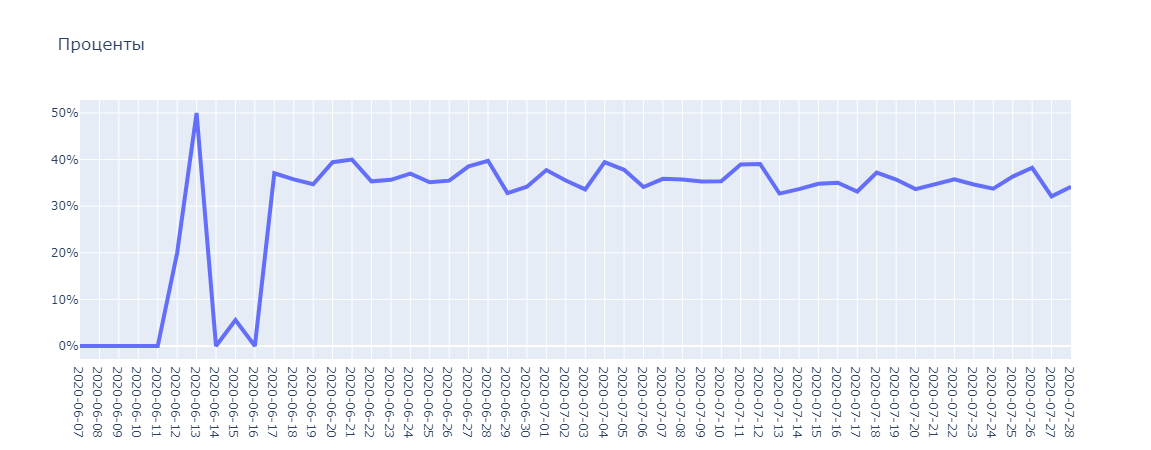

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_group_45['Дата'],
                         y=df_group_45['ДоляМеньше1Дня'], 
# Не требуются:                         
#                          mode='lines' - работает по умолчанию,
#                          name='В РСЦ' - не отображается на единичном графике,
#           
                         line_width=4
                        )
             )

fig.update_layout(title='Проценты') # заголовок графика

fig.update_yaxes(tickformat='%') # шаблон тикеров по оси "y".

fig.update_xaxes(type='category') # ось x изменена на тип "Категориальной оси", тоесть принимает все характерные отличия строк из "df_group_45['Дата']"

fig.show()